In [2]:
import numpy as np
import pandas as pd
import io

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('C:/KAGGLE/Sale_price_prediction/train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


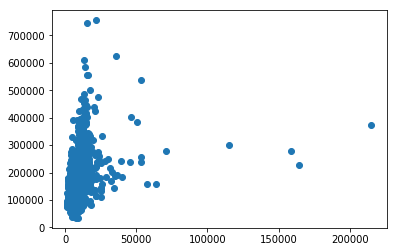

In [9]:
plt.scatter(df['LotArea'],df['SalePrice'])
plt.show()

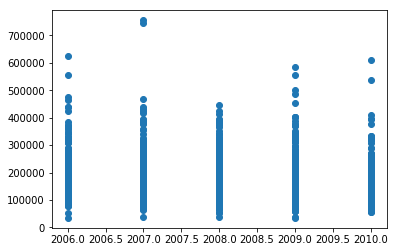

In [21]:
plt.scatter(df['YrSold'],df['SalePrice'])

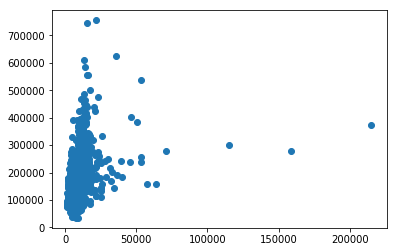

In [27]:
a= df['Street']=='Pave'
df1=df[a]
plt.scatter(df1['LotArea'],df1['SalePrice'])

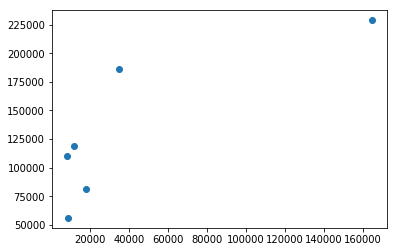

In [28]:
b= df['Street']=='Grvl'
df2=df[b]
plt.scatter(df2['LotArea'],df2['SalePrice'])

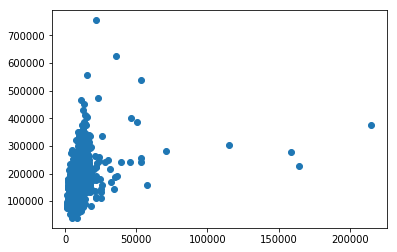

In [38]:
c= df['SaleCondition']=='Normal' 
df3= df[c]
plt.scatter(df3['LotArea'],df3['SalePrice'])

In [34]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [160]:
from sklearn.linear_model import Ridge
#x= df.drop(['SalePrice','MSZoning','LotFrontage','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','Condition2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','SaleCondition','SaleType','GarageType','Fireplaces','MiscFeature','Fence','PoolQC','PavedDrive','GarageCond','GarageQual','GarageFinish','Functional','KitchenQual','Electrical','CentralAir','HeatingQC','Heating','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Foundation','ExterCond','ExterQual','MasVnrType'],axis=1)
df1= df._get_numeric_data()

x= df1.drop(['LotFrontage','MasVnrArea','SalePrice'],axis=1)
x = x.fillna(method='ffill')
y= df['SalePrice']
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.46)
clf= Ridge()
#clf.fit(x_train,y_train)
x

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
5,6,50,14115,5,5,1993,1995,732,0,64,...,480,40,30,0,320,0,0,700,10,2009
6,7,20,10084,8,5,2004,2005,1369,0,317,...,636,255,57,0,0,0,0,0,8,2007
7,8,60,10382,7,6,1973,1973,859,32,216,...,484,235,204,228,0,0,0,350,11,2009
8,9,50,6120,7,5,1931,1950,0,0,952,...,468,90,0,205,0,0,0,0,4,2008
9,10,190,7420,5,6,1939,1950,851,0,140,...,205,0,4,0,0,0,0,0,1,2008


In [161]:
clf.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [162]:
y_pred=clf.predict(x_test)

In [163]:
from sklearn.metrics import r2_score

In [164]:
r2_score(y_test,y_pred)

0.7755298608345133

In [165]:
test= pd.read_csv('C:/KAGGLE/Sale_price_prediction/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [166]:
ndf= test._get_numeric_data()
x1 = x1.fillna(method='ffill')
x1

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010
5,1466,60,10000,6,5,1993,1994,0.0,0.0,763.0,...,440.0,157,84,0,0,0,0,0,4,2010
6,1467,20,7980,6,7,1992,2007,935.0,0.0,233.0,...,420.0,483,21,0,0,0,0,500,3,2010
7,1468,60,8402,6,5,1998,1998,0.0,0.0,789.0,...,393.0,0,75,0,0,0,0,0,5,2010
8,1469,20,10176,7,5,1990,1990,637.0,0.0,663.0,...,506.0,192,0,0,0,0,0,0,2,2010
9,1470,20,8400,4,5,1970,1970,804.0,78.0,0.0,...,525.0,240,0,0,0,0,0,0,4,2010


In [171]:
test['SalePrice']= clf.predict(x1)
test['SalePrice']

0       120562.549724
1       150359.431730
2       167430.718639
3       201206.799182
4       199044.801834
5       187189.704191
6       202233.841132
7       180091.604455
8       205725.165273
9       113845.584700
10      202182.046054
11      101398.612598
12       80671.266892
13      149663.435911
14      119420.541933
15      317558.211816
16      248576.145778
17      280462.621198
18      271831.494264
19      367272.871466
20      287304.486771
21      214538.865235
22      180010.766019
23      181865.070833
24      208678.570937
25      211892.201895
26      282616.373536
27      255042.343518
28      187628.734293
29      233916.270378
            ...      
1429     51819.982518
1430    121969.220935
1431     29656.235882
1432     66121.407288
1433     26053.075824
1434    256120.117897
1435    243417.184280
1436    193882.362292
1437    171437.664462
1438    225010.620431
1439    160678.832754
1440    217361.776301
1441    195744.046682
1442    297970.095375
1443    31

In [179]:
test.to_csv('C:/KAGGLE/Sale_price_prediction/submission.csv')